In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import RidgeClassifierCV

In [10]:
window_size = 5
overlap_size = 0.25

# Hand-crafted Features

In [11]:
file_name = f"{window_size}_{str(overlap_size).replace('.', '_')}"

with open(f'./feature_window_overlap_combinations/feature_data_{file_name}.pkl', 'rb') as f:
    feature_data = pickle.load(f)

In [5]:
rf_classifier_HC = RandomForestClassifier(max_depth=30, min_samples_split=2, 
                                       n_estimators=100, random_state=42)

rf_classifier_HC.fit(feature_data['HC_X_train_features'], feature_data['Y_train'])

RandomForestClassifier(max_depth=30, random_state=42)

/tmp/ipykernel_2926086/1295501968.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_HC_df, palette='viridis')


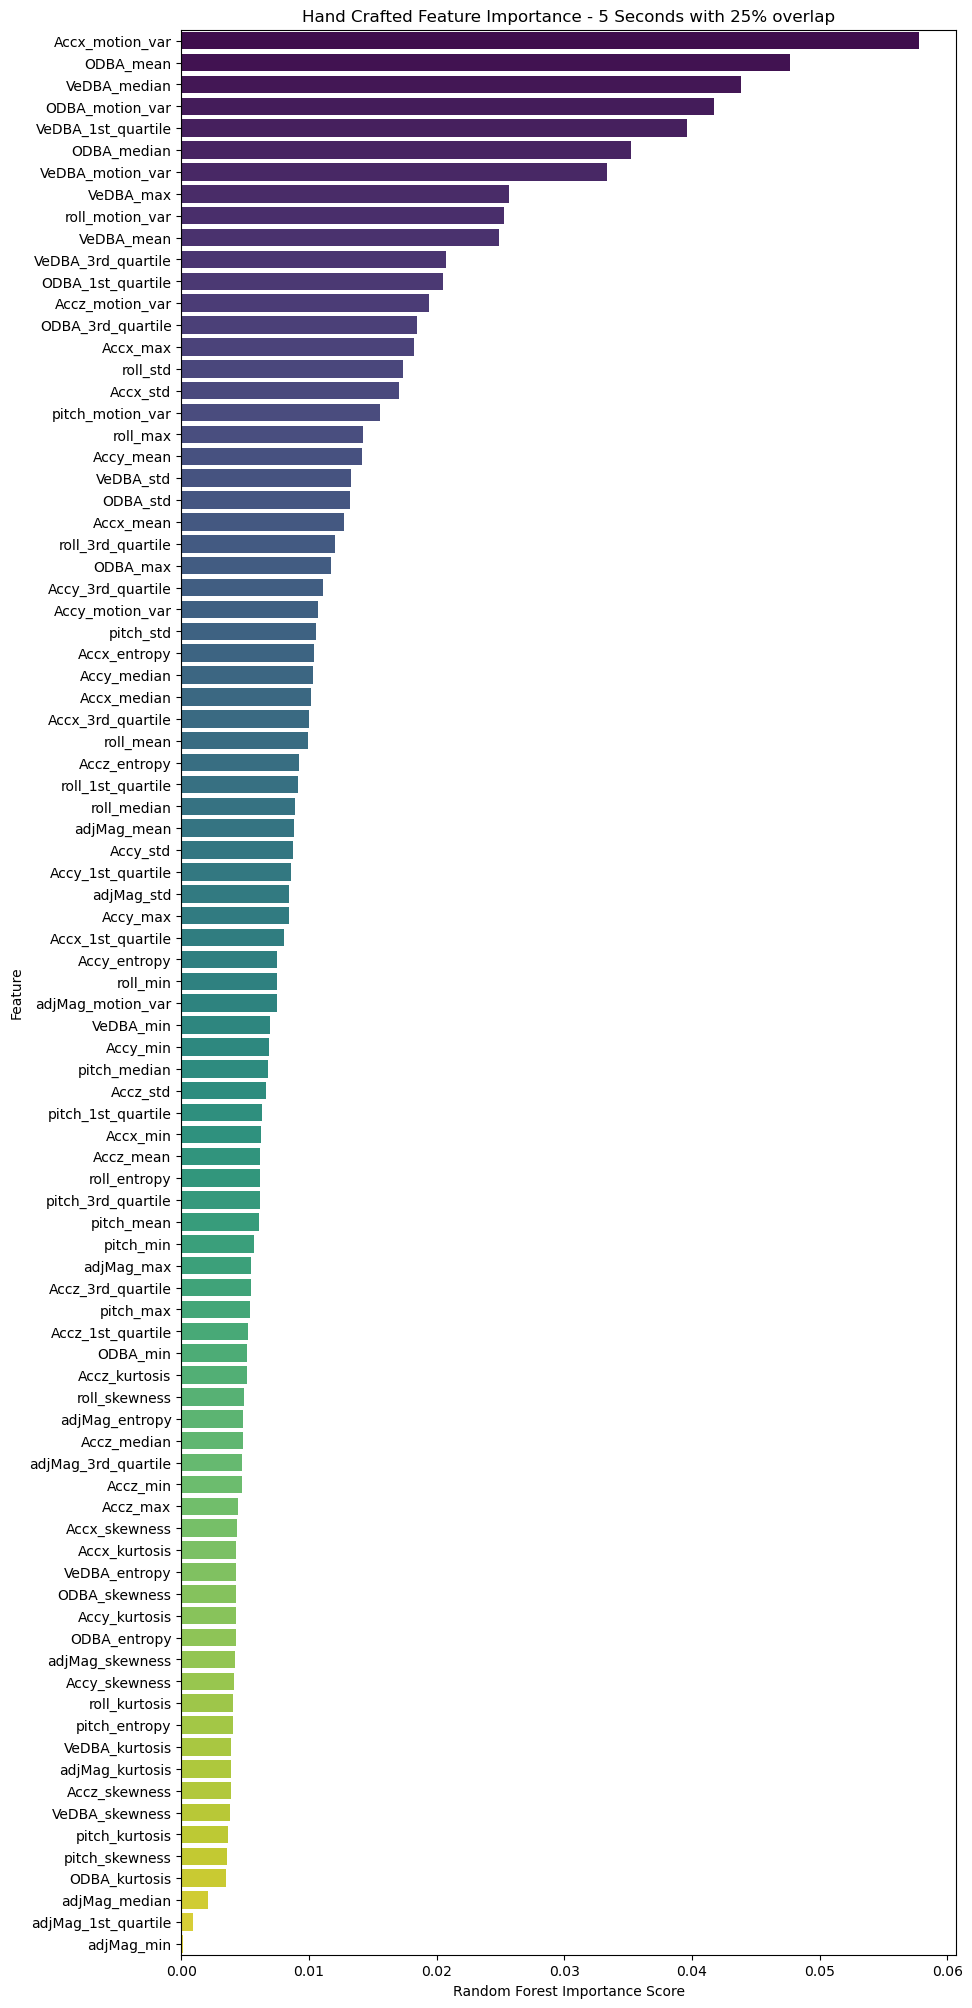

In [6]:
# Extract feature importances
importances_HC = rf_classifier_HC.feature_importances_

# Get feature names
feature_names_HC = feature_data['HC_X_train_features'].columns

# Create a DataFrame for sorting
feat_importance_HC_df = pd.DataFrame({'Feature': feature_names_HC, 'Importance': importances_HC})

# Sort by importance
feat_importance_HC_df = feat_importance_HC_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 25))
sns.barplot(x='Importance', y='Feature', data=feat_importance_HC_df, palette='viridis')
plt.title('Hand Crafted Feature Importance - 5 Seconds with 25% overlap')
plt.xlabel('Random Forest Importance Score')
plt.ylabel('Feature')
plt.show()

In [7]:
feat_importance_HC_df.to_csv('HC_feature_importance.csv', index=False)

In [8]:
# Compute mean feature importance
mean_importance = np.mean(importances_HC)

# Filter features with importance > mean importance
selected_features_HC = feature_names_HC[importances_HC > mean_importance]

# Create new datasets
X_train_original = feature_data['HC_X_train_features']
X_test_original = feature_data['HC_X_test_features']
Y_train = feature_data['Y_train']
Y_test = feature_data['Y_test']

X_train_filtered = X_train_original[selected_features_HC]
X_test_filtered = X_test_original[selected_features_HC]

# Train & evaluate on original feature set
rc_classifier = RidgeClassifierCV(alphas=np.logspace(-1,10,100), class_weight='balanced', fit_intercept=True)
rc_classifier.fit(X_train_original, Y_train)
y_pred_original = rc_classifier.predict(X_test_original)
balanced_acc_original = balanced_accuracy_score(Y_test, y_pred_original)

# Train & evaluate on filtered feature set
rc_classifier.fit(X_train_filtered, Y_train)
y_pred_filtered = rc_classifier.predict(X_test_filtered)
balanced_acc_filtered = balanced_accuracy_score(Y_test, y_pred_filtered)

# Print results
print(f"Balanced Accuracy (Original Features): {balanced_acc_original:.4f}")
print(f"Balanced Accuracy (Filtered Features): {balanced_acc_filtered:.4f}")
print(f"Number of features before filtering: {X_train_original.shape[1]}")
print(f"Number of features after filtering: {X_train_filtered.shape[1]}")

Balanced Accuracy (Original Features): 0.6641
Balanced Accuracy (Filtered Features): 0.5263
Number of features before filtering: 88
Number of features after filtering: 25


# Catch24 Features

In [12]:
rf_classifier_Catch24 = RandomForestClassifier(max_depth=30, min_samples_split=2, 
                                       n_estimators=100, random_state=42)

rf_classifier_Catch24.fit(feature_data['Catch24_X_train_features'], feature_data['Y_train'])

RandomForestClassifier(max_depth=30, random_state=42)

/tmp/ipykernel_2926086/3152627735.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df_Catch24, palette='viridis')


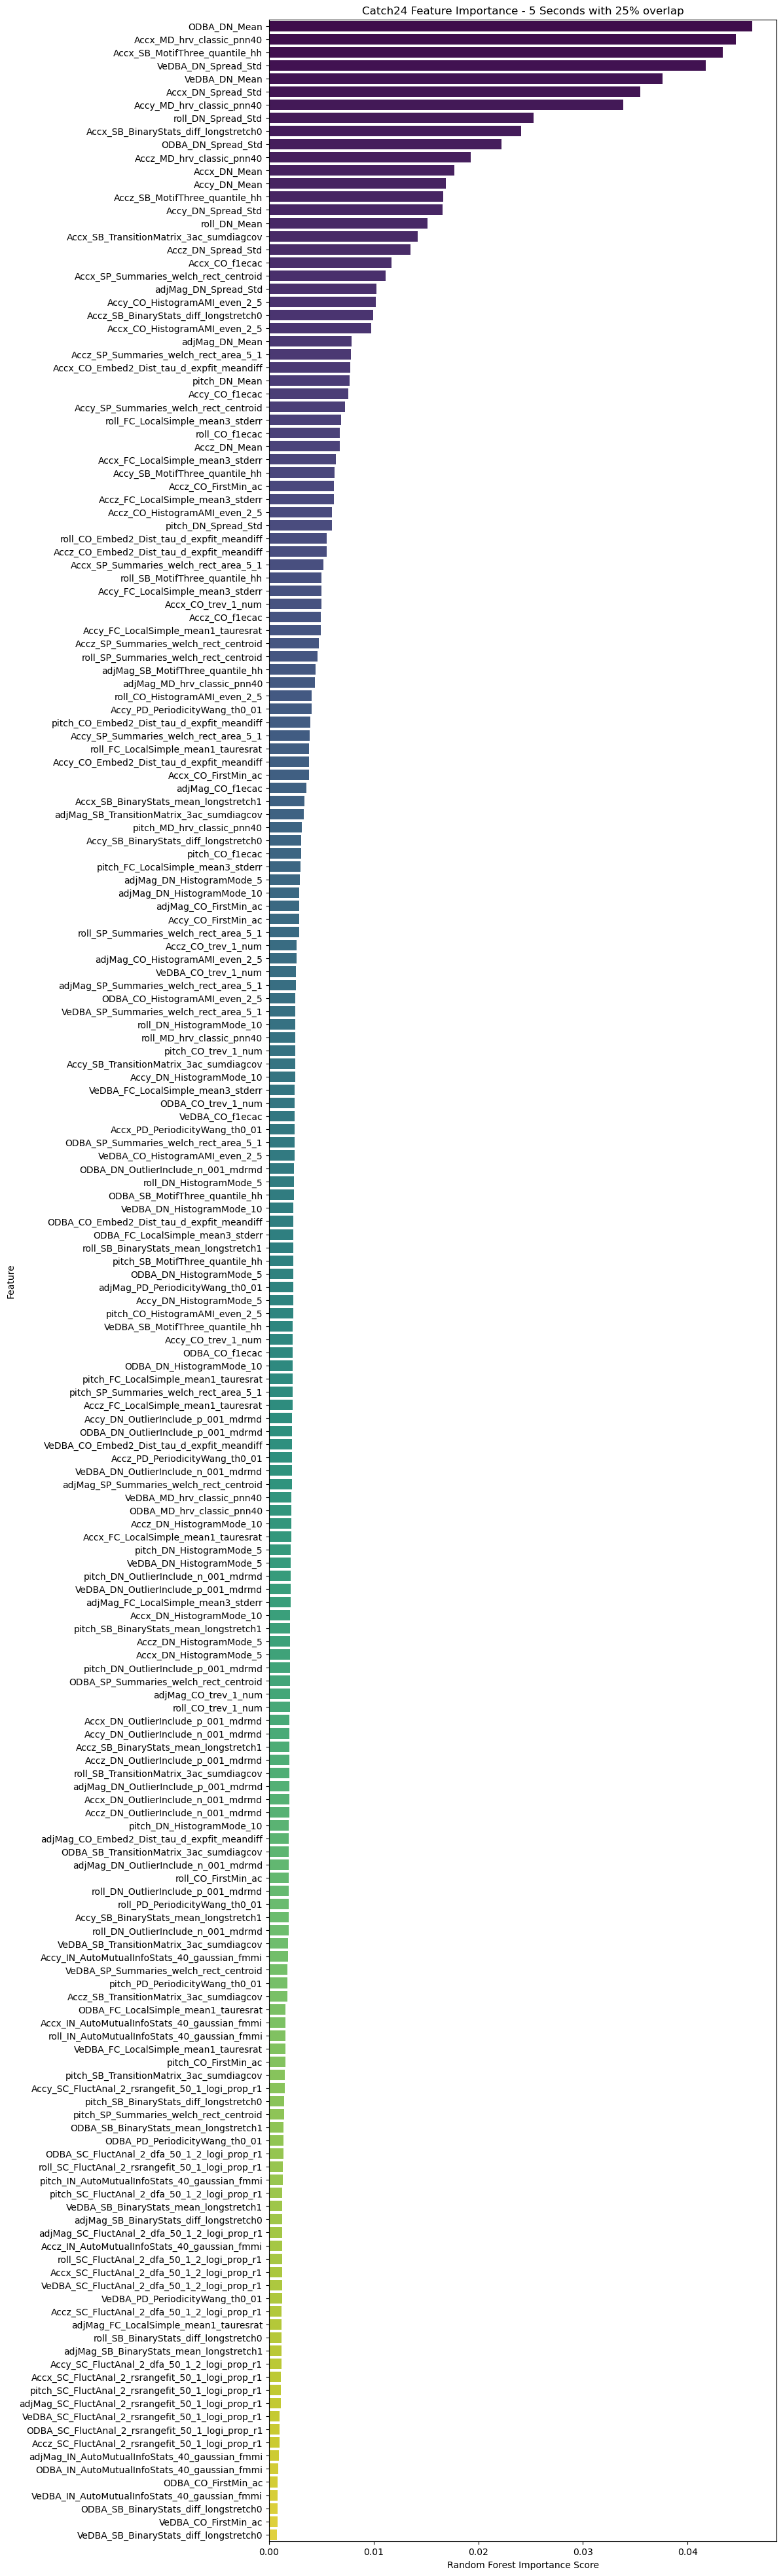

In [13]:
# Extract feature importances
importances_Catch24 = rf_classifier_Catch24.feature_importances_

# Get feature names
feature_names_Catch24 = feature_data['Catch24_X_train_features'].columns

# Create a DataFrame for sorting
feat_importance_df_Catch24 = pd.DataFrame({'Feature': feature_names_Catch24, 'Importance': importances_Catch24})

# Sort by importance
feat_importance_df_Catch24 = feat_importance_df_Catch24.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 50))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df_Catch24, palette='viridis')
plt.title('Catch24 Feature Importance - 5 Seconds with 25% overlap')
plt.xlabel('Random Forest Importance Score')
plt.ylabel('Feature')
plt.show()

In [14]:
feat_importance_df_Catch24.to_csv('Catch22_feature_importance.csv', index=False)

In [15]:
# Compute mean feature importance
mean_importance = np.mean(importances_Catch24)

# Filter features with importance > mean importance
selected_features_Catch24 = feature_names_Catch24[importances_Catch24 > mean_importance]

# Create new datasets
X_train_original = feature_data['Catch24_X_train_features']
X_test_original = feature_data['Catch24_X_test_features']
Y_train = feature_data['Y_train']
Y_test = feature_data['Y_test']

X_train_filtered = X_train_original[selected_features_Catch24]
X_test_filtered = X_test_original[selected_features_Catch24]

rc_classifier = RidgeClassifierCV(alphas=np.logspace(-1,10,100), class_weight='balanced', fit_intercept=True)

# Train & evaluate on original feature set
rc_classifier.fit(X_train_original, Y_train)
y_pred_original = rc_classifier.predict(X_test_original)
balanced_acc_original = balanced_accuracy_score(Y_test, y_pred_original)

# Train & evaluate on filtered feature set
rc_classifier.fit(X_train_filtered, Y_train)
y_pred_filtered = rc_classifier.predict(X_test_filtered)
balanced_acc_filtered = balanced_accuracy_score(Y_test, y_pred_filtered)

# Print results
print(f"Balanced Accuracy (Original Features): {balanced_acc_original:.4f}")
print(f"Balanced Accuracy (Filtered Features): {balanced_acc_filtered:.4f}")
print(f"Number of features before filtering: {X_train_original.shape[1]}")
print(f"Number of features after filtering: {X_train_filtered.shape[1]}")

Balanced Accuracy (Original Features): 0.7476
Balanced Accuracy (Filtered Features): 0.7051
Number of features before filtering: 192
Number of features after filtering: 41


# ROCKET Features

In [17]:
file_name = f"{window_size}_{str(overlap_size).replace('.', '_')}"

with open(f'../feature_window_overlap_combinations/feature_data_{file_name}.pkl', 'rb') as f:
    feature_data = pickle.load(f)

In [18]:
rf_classifier_ROCKET = RandomForestClassifier(max_depth=None, min_samples_split=2, 
                                       n_estimators=100, random_state=42)

rf_classifier_ROCKET.fit(feature_data['X_train_features'], feature_data['Y_train'])

RandomForestClassifier(random_state=42)

In [19]:
# Extract feature importances
importances_ROCKET = rf_classifier_ROCKET.feature_importances_

# Get feature names
feature_names_ROCKET = feature_data['X_train_features'].columns

# Compute mean feature importance
mean_importance = np.mean(importances_ROCKET)

# Filter features with importance > mean importance
selected_features_ROCKET = feature_names_ROCKET[importances_ROCKET > mean_importance]

# Create new datasets
X_train_original = feature_data['X_train_features']
X_test_original = feature_data['X_test_features']
Y_train = feature_data['Y_train']
Y_test = feature_data['Y_test']

X_train_filtered = X_train_original[selected_features_ROCKET]
X_test_filtered = X_test_original[selected_features_ROCKET]

rc_classifier = RidgeClassifierCV(alphas=np.logspace(-1,10,100), class_weight='balanced', fit_intercept=True)
# Train & evaluate on original feature set
rc_classifier.fit(X_train_original, Y_train)
y_pred_original = rc_classifier.predict(X_test_original)
balanced_acc_original = balanced_accuracy_score(Y_test, y_pred_original)

# Train & evaluate on filtered feature set
rc_classifier.fit(X_train_filtered, Y_train)
y_pred_filtered = rc_classifier.predict(X_test_filtered)
balanced_acc_filtered = balanced_accuracy_score(Y_test, y_pred_filtered)

# Print results
print(f"Balanced Accuracy (Original Features): {balanced_acc_original:.4f}")
print(f"Balanced Accuracy (Filtered Features): {balanced_acc_filtered:.4f}")
print(f"Number of features before filtering: {X_train_original.shape[1]}")
print(f"Number of features after filtering: {X_train_filtered.shape[1]}")

Balanced Accuracy (Original Features): 0.8074
Balanced Accuracy (Filtered Features): 0.7873
Number of features before filtering: 9996
Number of features after filtering: 1269
